# Project 2 - Aimes Housing Dataset

### Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

### Data Analysis

In [3]:
df.shape

(2051, 81)

In [4]:
test.shape

(879, 80)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

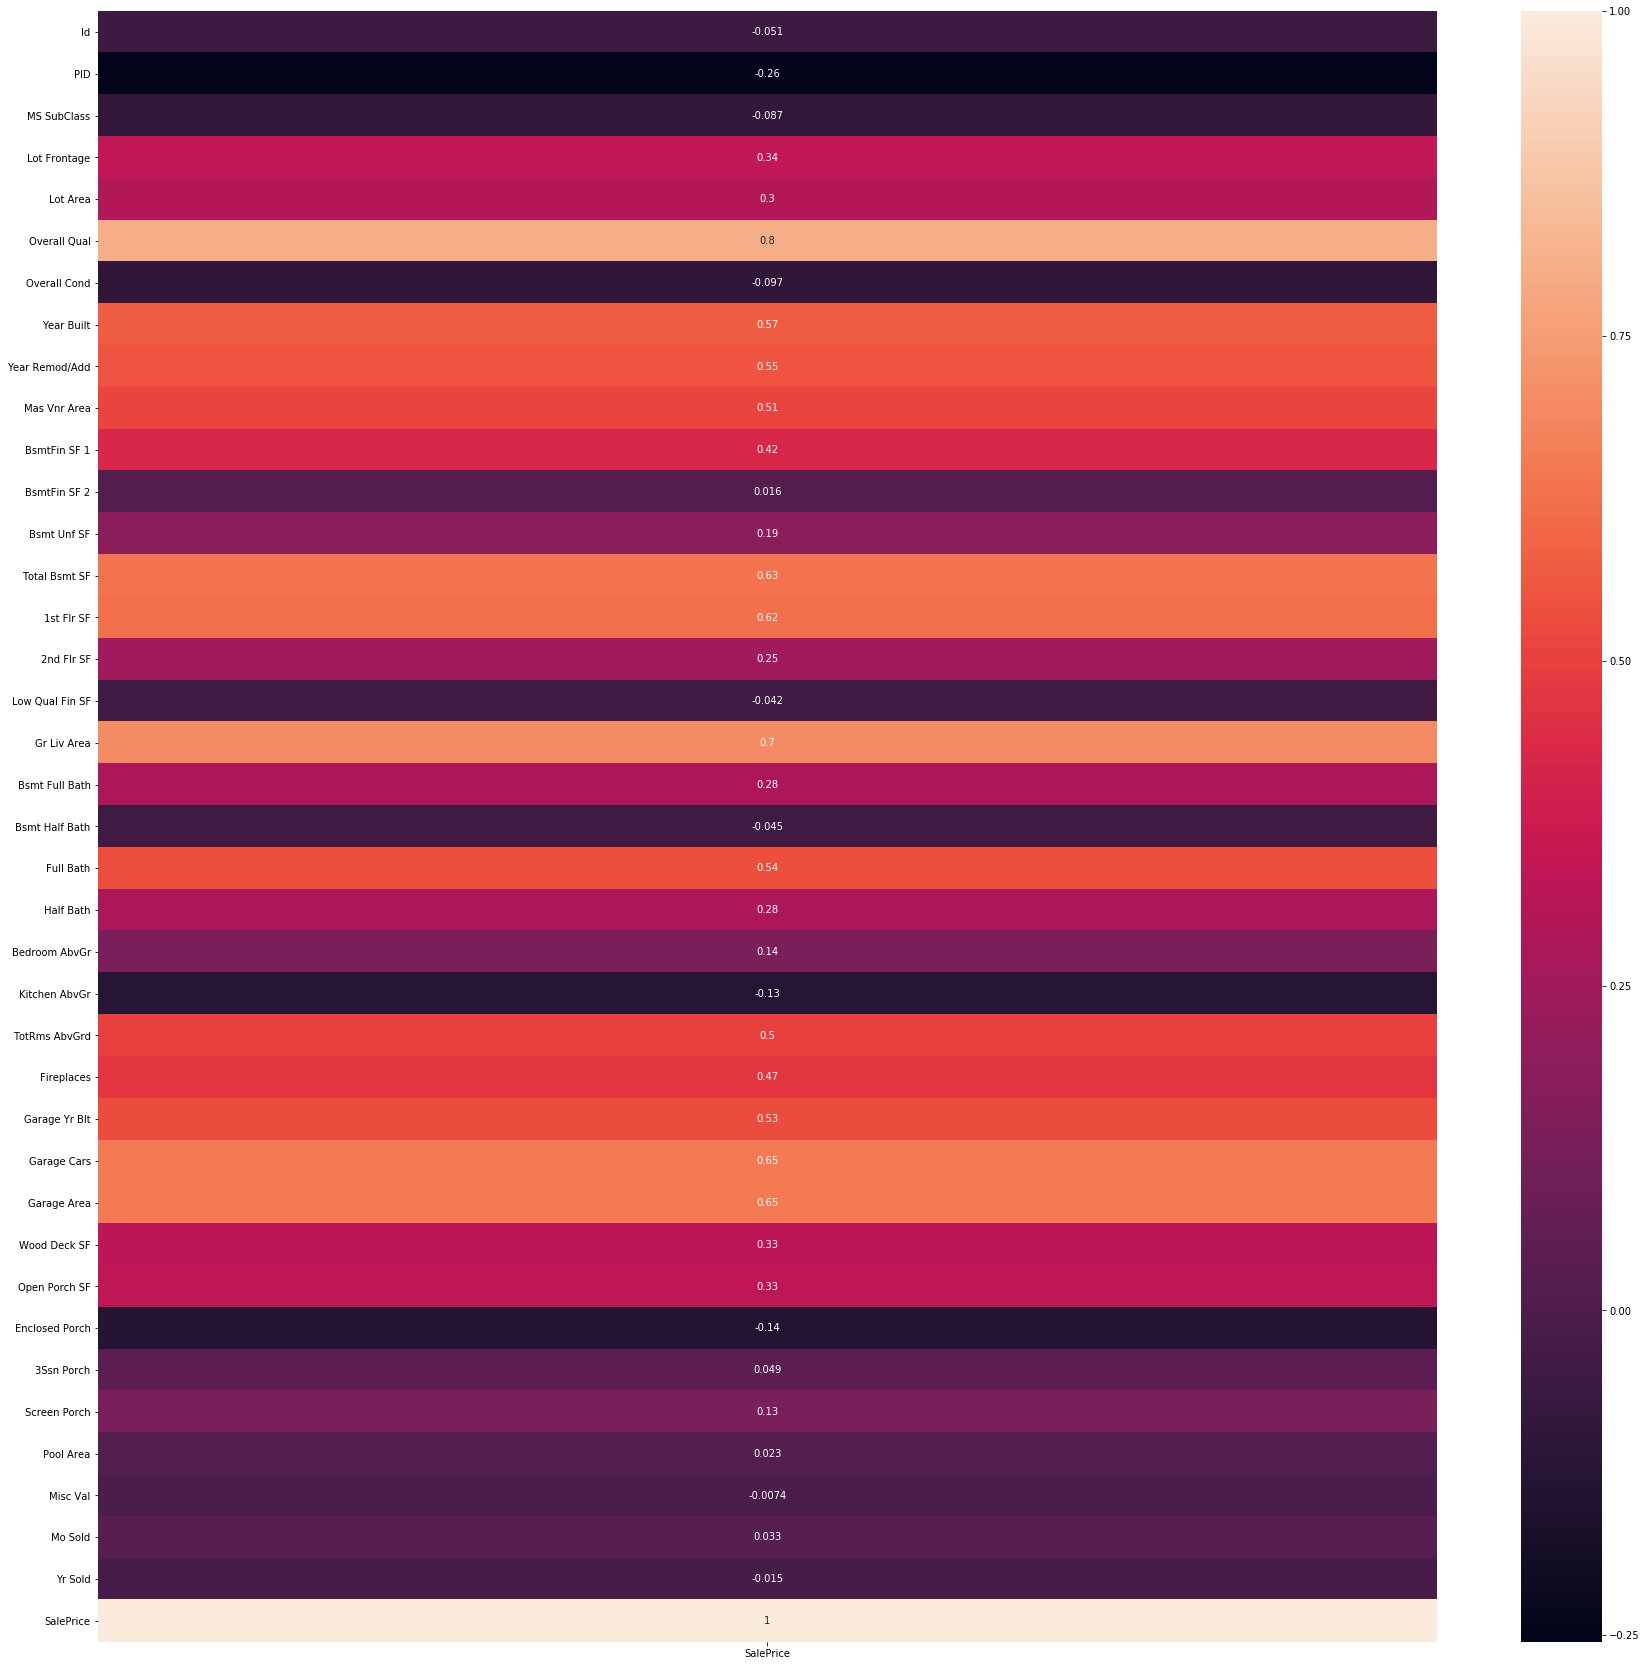

In [6]:
numeric_col= df.select_dtypes(exclude=['object']).columns
fig = plt.figure(figsize = (30,30))
df[numeric_col].corr()
sns.heatmap(df[numeric_col].corr()[['SalePrice']],annot=True)

### Null Value Cleaning

In [7]:
df.isnull().sum()[df.isnull().sum() > 0] #Null Values in the Dataset

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

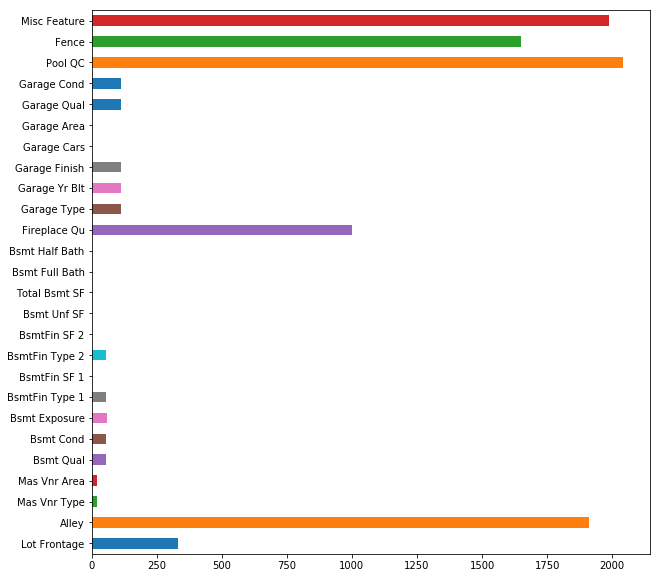

In [8]:
df.isnull().sum()[df.isnull().sum() > 0].plot.barh(figsize=(10, 10))

In [9]:
df.isnull().sum()[df.isnull().sum() > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [10]:
#From above and info filling numnerical data
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Area']/140) 
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0)
df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(0)
df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(0)
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)
df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0)
df['Garage Cars'] = df['Garage Cars'].fillna(0)
df['Garage Area'] = df['Garage Area'].fillna(0)

#From above and info filling nulls in object types
df['Alley'] = df['Alley'].fillna('N/A')
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('N/A')
df['Bsmt Qual'] = df['Bsmt Qual'].fillna('N/A')
df['Bsmt Cond'] = df['Bsmt Cond'].fillna('N/A')
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('N/A')
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna('N/A')
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna('N/A')
df['Electrical'] = df['Electrical'].fillna('N/A')
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('N/A')
df['Garage Type'] = df['Garage Type'].fillna('N/A')
df['Garage Finish'] = df['Garage Finish'].fillna('N/A')
df['Garage Qual'] = df['Garage Qual'].fillna('N/A')
df['Garage Cond'] = df['Garage Cond'].fillna('N/A')
df['Pool QC'] = df['Pool QC'].fillna('N/A')
df['Fence'] = df['Fence'].fillna('N/A')
df['Misc Feature'] = df['Misc Feature'].fillna('N/A')

In [11]:
df.isnull().sum()[df.isnull().sum()>0] #All the nulls are removed

Series([], dtype: int64)

In [12]:
test.isnull().sum()[test.isnull().sum() > 0]

Lot Frontage      160
Alley             821
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           875
Fence             707
Misc Feature      838
dtype: int64

In [13]:
#From above and info filling numnerical data
test['Lot Frontage'] = test['Lot Frontage'].fillna(test['Lot Area']/140) 
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(test['Year Built'])
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0)
#From above and info filling nulls in object types
test['Alley'] = test['Alley'].fillna('N/A')
test['Mas Vnr Type'] = test['Mas Vnr Type'].fillna('N/A')
test['Bsmt Qual'] = test['Bsmt Qual'].fillna('N/A')
test['Bsmt Cond'] = test['Bsmt Cond'].fillna('N/A')
test['Bsmt Exposure'] = test['Bsmt Exposure'].fillna('N/A')
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].fillna('N/A')
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].fillna('N/A')
test['Electrical'] = test['Electrical'].fillna('N/A')
test['Fireplace Qu'] = test['Fireplace Qu'].fillna('N/A')
test['Garage Type'] = test['Garage Type'].fillna('N/A')
test['Garage Finish'] = test['Garage Finish'].fillna('N/A')
test['Garage Qual'] = test['Garage Qual'].fillna('N/A')
test['Garage Cond'] = test['Garage Cond'].fillna('N/A')
test['Pool QC'] = test['Pool QC'].fillna('N/A')
test['Fence'] = test['Fence'].fillna('N/A')
test['Misc Feature'] = test['Misc Feature'].fillna('N/A')


In [14]:
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

In [15]:
test.shape

(879, 80)

In [16]:
df.shape

(2051, 81)

### Target Variable - Outliers

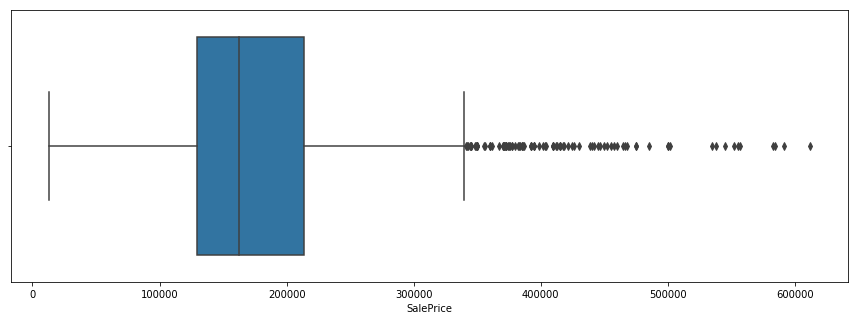

In [17]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(df.SalePrice)

In [18]:
np.std(df['SalePrice'])

79239.33504161824

In [19]:
np.median(df['SalePrice'])

162500.0

In [20]:
#Removing SalePrice>=500000 as outliers
df=df[df['SalePrice']<500000]

### Looking at Liv Area v/s Price

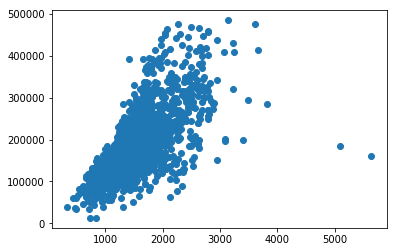

In [21]:
plt.scatter(df['Gr Liv Area'],df['SalePrice'])

In [22]:
df=df[df['Gr Liv Area']<4000] #removing outlier for Liv Area

### Converting Objects(category) to Numerics

In [23]:
categorical_columns=list(df.select_dtypes(include=['object']).columns)

In [24]:
for col in categorical_columns:
    train_values = sorted(list(df[col].unique()))
    test_values = sorted(list(test[col].unique()))
    categories = set(train_values + test_values)
    df[col] = pd.Categorical(df[col],categories=categories)
    test[col] = pd.Categorical(test[col],categories=categories)

In [25]:
df = pd.get_dummies(df) # To feed into our regression model

In [26]:
test = pd.get_dummies(test)

In [27]:
df.shape

(2036, 315)

In [28]:
test.shape

(879, 314)

### Feature Selection
#### We create Total Area and Total Bathrooms as the below have good correlation


In [29]:
df['Total Area'] = df['Gr Liv Area']+ df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF'] 
df['Total_Bathrooms'] = (df['Full Bath'] + (0.5*df['Half Bath']) + df['Bsmt Full Bath'])

In [30]:
test['Total Area'] =test['Gr Liv Area']+ test['Total Bsmt SF'] + test['1st Flr SF'] + test['2nd Flr SF'] 
test['Total_Bathrooms'] = test['Full Bath'] + (0.5*test['Half Bath']) + test['Bsmt Full Bath']

In [31]:
df.drop(['Id','PID'],axis=1,inplace=True)
test.drop(['Id','PID'],axis=1,inplace=True)

In [32]:
#df.corr()["SalePrice"].sort_values(ascending=False).head(50) #top 50 new features

### Regression Modelling

In [33]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline

####  Selecting feature and target

In [34]:
#poly = PolynomialFeatures(include_bias=False,degree=2)
X_train = df.drop('SalePrice', axis=1)
#X_train_poly = poly.fit_transform(X_train)
#test_poly = poly.fit_transform(test)
ss = StandardScaler()
Xs = ss.fit_transform(X_train)#(X_train_poly)
y=df['SalePrice']

#### Cross Validation and Scoring

In [35]:
#Cross validation
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
#Model Scoring Function
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y,scoring="neg_mean_squared_error",cv = kfolds))
    return(rmse)
def cv_r2(model):
    r2 = np.mean(cross_val_score(model, X_train, y,scoring="r2",cv = kfolds))
    return(r2)

In [36]:
lr = LinearRegression()
lr_model = make_pipeline(RobustScaler(),lr).fit(X_train, y)
cv_rmse(lr_model).mean()
#It is performing worse than the dataset

65008665807.53288

#### Lasso Regression as lasso is good at eliminating coefficients.

In [37]:
# def lasso_selector(a):
#     lasso_model = make_pipeline(RobustScaler(),LassoCV(max_iter=1e7, alphas = [a],cv=kfolds)).fit(X_train, y)
#     lasso_rmse = cv_rmse(lasso_model).mean()
#     return(lasso_rmse)
# lasso_alphas = [1, 3, 5, 10, 15, 20, 30, 50, 100, 200, 500, 700, 1000]
# lasso_scores = []
# for alpha in lasso_alphas:
#     score = lasso_selector(alpha)
#     lasso_scores.append(score)  

In [38]:
lasso_regression = LassoCV(max_iter=1e7, n_alphas = 5000, cv=kfolds, n_jobs=-1)
lasso_regression.fit(Xs, y)
print(lasso_regression.alpha_)

255.04311385087723


In [39]:
# Using Optimum Alpha
lasso_model = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=[251.54309596336955], cv=kfolds, n_jobs=-1)).fit(X_train, y)
lasso_rmse = cv_rmse(lasso_model).mean()
lasso_rmse

20940.997396481558

In [40]:
cv_r2(lasso_model).mean()

0.9187530369141561

#### Ridge Regression 

In [41]:
def ridge(a):
    ridge_model = make_pipeline(RobustScaler(),RidgeCV(alphas = [a],cv=kfolds)).fit(X_train, y)
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)
r_alphas = [.0001, .0003, .0005, .0007, .0009,.01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 100]
ridge_scores = []
for alpha in r_alphas:
    score = ridge(alpha)
    ridge_scores.append(score)   

,RMSE
0.0001,21089.675302
0.0003,21085.863069
0.0005,21082.096176
0.0007,21078.373734
0.0009,21074.694878
0.0100,20942.524694
0.0500,20684.102895
0.1000,20555.908187
0.3000,20380.503074
1.0000,20234.054067


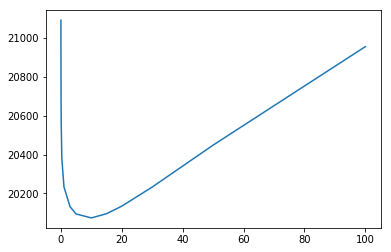

In [42]:
# Analyzing our Alphas
plt.plot(r_alphas, ridge_scores, label='Ridge')
ridge_score_table = pd.DataFrame(ridge_scores, r_alphas, columns=['RMSE'])
ridge_score_table

In [43]:
# Using optimum alpha
ridge_model2 = make_pipeline(RobustScaler(),RidgeCV(alphas = [10],cv=kfolds)).fit(X_train, y)
cv_rmse(ridge_model2).mean()

20074.46719341343

In [44]:
cv_r2(ridge_model2).mean()

0.9252145599829115

#### Grid Search - Models for fun

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
params={}
gs= GridSearchCV(RandomForestRegressor(), param_grid=params)
gs.fit(X_train, df['SalePrice'])
print(gs.best_score_)

0.8839866203147951


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
params={}
gs2= GridSearchCV(AdaBoostRegressor(), param_grid=params)
gs2.fit(X_train, df['SalePrice'])
print(gs2.best_score_)

0.8616982772118235


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
params={}
gs3= GridSearchCV(ExtraTreesRegressor(), param_grid=params)
gs3.fit(X_train, df['SalePrice'])
print(gs3.best_score_)

0.8967183566932369


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
params={}
gs4= GridSearchCV(GradientBoostingRegressor(), param_grid=params)
gs4.fit(X_train, df['SalePrice'])
print(gs4.best_score_)

0.921409892180763


In [49]:
# xgb_regressor = XGBRegressor(
#                 learning_rate =0.01,
#                 n_estimators = 4000,
#                 max_depth=3,
#                 min_child_weight=1,
#                 gamma=0.01,
#                 subsample=1,
#                 colsample_bytree=1,
#                 reg_lambda = 0.5,
#                 reg_alpha = 0.5,
#                 scale_pos_weight=1,
#                 objective= 'reg:linear',
#                 seed=10)
# xgb_regressor.fit(X_train,y)

### Submission to Kaggle

In [50]:
# X_test=test
# y_SalePrice_predict = model.predict(X_test)
# test['SalePrice'] = y_SalePrice_predict
# test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)